## Observations and Insights 

In [278]:
#Findings: 1. It was a very unbiased study in respect to both gender of the mice and the amount of mice dedicated to each drug.
#2. As the weight of the mice goes up so does the minimum tumor volume. I thought this was interesting because the largest size tumors could still be found in the smallest mice.
#3. Capomulin had an obvious positive effect on the mouse I chose. I would have to do more research to see if it has the same effect on other mice, or this mouse was an outlier.



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how='inner')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [279]:
# Checking the number of mice.
n_of_mice = merged_df.nunique()
n_of_mice["Mouse ID"]

249

In [280]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [281]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_ID)== True]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [282]:
# Checking the number of mice in the clean DataFrame.
n_clean_mice = clean_df.nunique()
n_clean_mice["Mouse ID"]

248

## Summary Statistics

In [283]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimene
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = clean_df.groupby(by=["Drug Regimen"])

mean_df = grouped_df.mean()["Tumor Volume (mm3)"]
mean_df

median_df = grouped_df.median()["Tumor Volume (mm3)"]
median_df

stdev_df = grouped_df.std()["Tumor Volume (mm3)"]
stdev_df

var_df = grouped_df.var()["Tumor Volume (mm3)"]
var_df

sem_df = grouped_df.sem()["Tumor Volume (mm3)"]
sem_df


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean_df, "Median":median_df, "Standard Deviation":stdev_df, "Variance":var_df, "SEM":sem_df})
summary_df

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [284]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = grouped_df.agg(["mean", "median","var","std","sem"])["Tumor Volume (mm3)"]
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

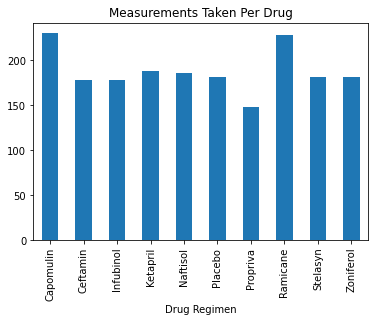

In [285]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pandas_bar = grouped_df.count()["Mouse ID"]
graph_p = pandas_bar.plot.bar(x="Drug Regimen", title="Measurements Taken Per Drug", y = "Measurements Taken")




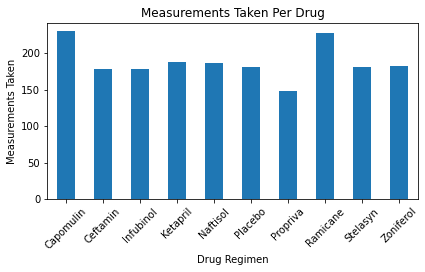

In [286]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_tot = grouped_df.count()["Mouse ID"]
#bar_tot

bar_plot = bar_tot.plot.bar()
plt.ylabel("Measurements Taken")
plt.title("Measurements Taken Per Drug")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


Text(0, 0.5, ' ')

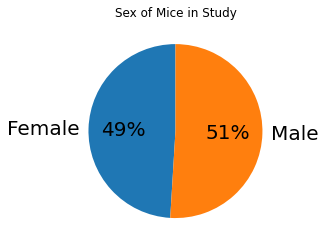

In [287]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_group = pd.DataFrame(clean_df.groupby(by=["Sex"]).count())
pie_pandas = pie_group["Mouse ID"]
pie_chart = pie_pandas.plot.pie(autopct = "%1.0f%%", title = "Sex of Mice in Study", startangle = 90,fontsize = 20)
pie_chart.set_ylabel(" ")




Text(0.5, 1.0, 'Sex of Mice in Study')

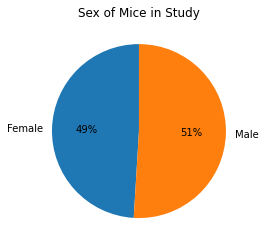

In [288]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0,0.1,0,0)
plt.pie(pie_pandas, startangle = 90, labels =["Female","Male"], autopct="%1.0f%%" )
plt.title("Sex of Mice in Study")


## Quartiles, Outliers and Boxplots

In [289]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin",:]
infubinol_df = merged_df.loc[merged_df["Drug Regimen"]=="Infubinol",:]
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"]=="Ceftamin",:]
ramicane_df = merged_df.loc[merged_df["Drug Regimen"]=="Ramicane",:]
# Start by getting the last (greatest) timepoint for each mouse
tumor_size = clean_df.groupby("Mouse ID").max()["Timepoint"]
tumor_size.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(clean_df,tumor_size, on=("Mouse ID","Timepoint"),how="inner")
tumor_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


In [290]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q75, q25 = np.percentile(tumor_merge["Tumor Volume (mm3)"],[75,25])
iqr = q75 - q25
iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    upper_bound = q3+(iqr*1.5)
    lower_bound = q1-(iqr*1.5)

IndentationError: unexpected indent (<ipython-input-290-abc004386e2c>, line 19)

In [291]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis = tumor_merge[]
plt.boxplot(str(tumor_merge))["Tumor Volumes (mm3)"]

SyntaxError: invalid syntax (<ipython-input-291-e0300fd46f4e>, line 2)

## Line and Scatter Plots

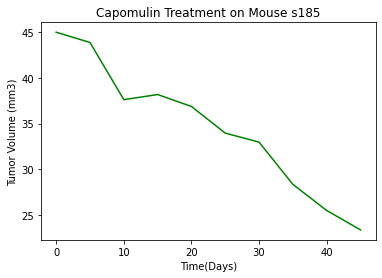

In [292]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185",:]
x_axis = capomulin_plot_df["Timepoint"]
y_axis = capomulin_plot_df["Tumor Volume (mm3)"]

plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment on Mouse s185')
plt.plot(x_axis, y_axis, color = "green")
plt.show()


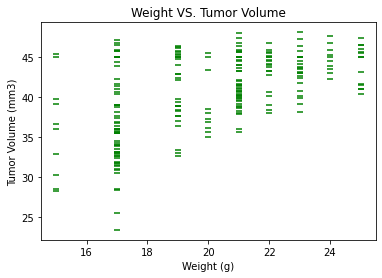

In [293]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin
x_axis = capomulin_df["Weight (g)"]
y_axis = capomulin_df["Tumor Volume (mm3)"]

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight VS. Tumor Volume')
plt.scatter(x_axis, y_axis, color = "green", marker = "_")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
